In [31]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pathlib import Path
import scipy.stats as st
%matplotlib inline

In [32]:
merged_obesity_walkscore = Path("../resources/Several_States_Complete.csv")
merged_df = pd.read_csv(merged_obesity_walkscore)
merged_df.head()

,State,CityName,UniqueID,CityFIPS,TractFIPS,ObesityScore,Lat,Lon,WalkScore
0,TX,Houston,4835000-48201451401,4835000.0,4.820145e+10,25.5,29.750367,-95.612367,51.0
1,TX,Garland,4829000-48113018138,4829000.0,4.811302e+10,30.6,32.850897,-96.582081,26.0
2,TX,Mesquite,4847892-48113012500,4847892.0,4.811301e+10,33.4,32.831949,-96.657915,46.0
3,TX,Dallas,4819000-48113004800,4819000.0,4.811300e+10,38.5,32.743677,-96.817550,85.0
4,TX,Fort Worth,4827000-48439105800,4827000.0,4.843911e+10,37.5,32.665385,-97.342787,54.0


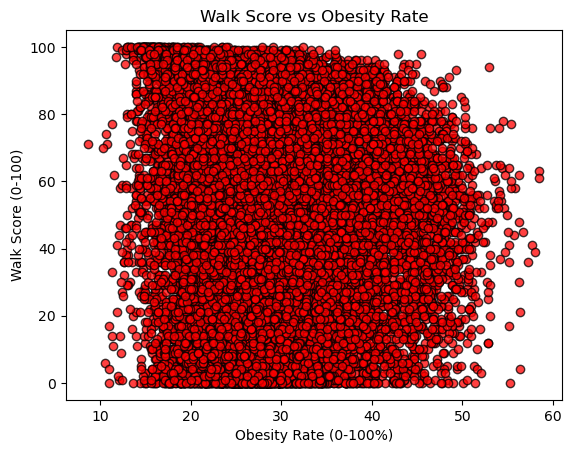

In [33]:
#Visualization 4 (Basic Scatterplot)

#Creating variables to match columns
walk_score = merged_df["WalkScore"]
obesity_rate = merged_df["ObesityScore"]

#Creating the scatterplot
plt.scatter(obesity_rate, walk_score, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75,)

#Making lables for the axis and title
plt.ylabel("Walk Score (0-100)")
plt.xlabel("Obesity Rate (0-100%)")
plt.title("Walk Score vs Obesity Rate")

#Save Image
plt.savefig("../Images/Base_Scatterplot.png")

plt.show()

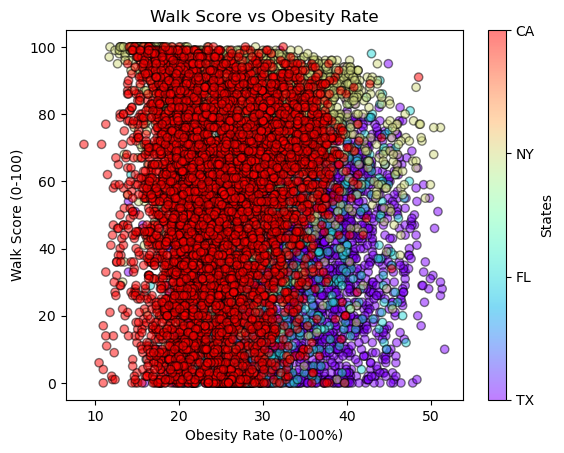

In [36]:
#Visualization 5 (Scatterplot with Each State a Different Color)

states_to_include = ["TX", "NY", "CA", "FL"]
filtered_df = merged_df[merged_df["State"].isin(states_to_include)]

# Naming Variables according to the columns of the filtered DataFrame
walk_score = filtered_df["WalkScore"]
obesity_rate = filtered_df["ObesityScore"]
states = filtered_df["State"]

# Creating loops to go through each state in the "State" columns and associate it with a different color
state_codes = {state: code for code, state in enumerate(states.unique())}
state_colors = [state_codes[state] for state in states]

# Creating the scatterplot, matching it to a variable
scatter = plt.scatter(obesity_rate, walk_score, c=state_colors, cmap='rainbow', edgecolor='black', marker="o", alpha=0.5)

# Labeling axes and color bar
cbar = plt.colorbar(scatter, ticks=list(state_codes.values()))
cbar.ax.set_yticklabels(states.unique())
cbar.set_label('States')
plt.ylabel("Walk Score (0-100)")
plt.xlabel("Obesity Rate (0-100%)")
plt.title("Walk Score vs Obesity Rate")

# Save as an image
plt.savefig("../Images/Scatterplot_biggest_states.png")

plt.show()

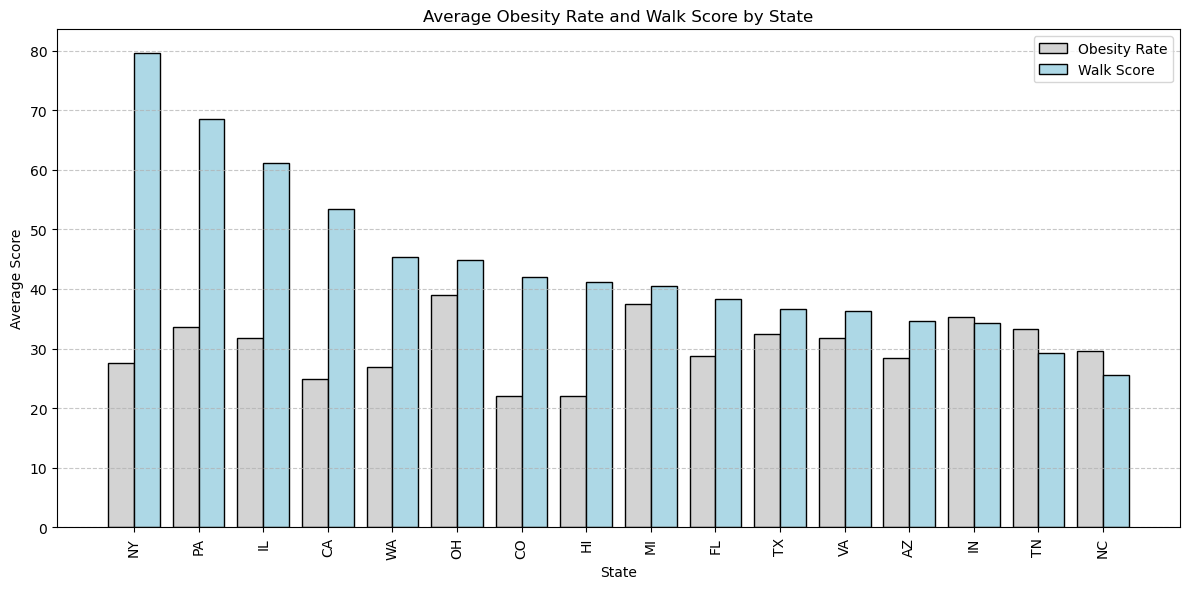

In [35]:
#Visualization 6 (Comparing Average Walkscore and Obesity Rate for the state)


#Find the average of walk score per each state and order it from highest to lowest
avg_walk_score_by_state = merged_df.groupby("State")["WalkScore"].mean().sort_values(ascending=False)

#Find the average of obesity score for each state
avg_obesity_by_state = merged_df.groupby("State")["ObesityScore"].mean().sort_values(ascending=False).reindex(avg_walk_score_by_state.index)

#Bar width
bar_width = 0.4

#Make a list containing the position for each state inside the bar chart
x_position = list(range(len(avg_obesity_by_state)))

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(x_position, avg_obesity_by_state, width=bar_width, color='lightgray', edgecolor='black', label='Obesity Rate')
plt.bar([x + bar_width for x in x_position], avg_walk_score_by_state, width=bar_width, color='lightblue', edgecolor='black', label='Walk Score')


#Create axis labels, titles, and tick lables
plt.xlabel("State")
plt.ylabel("Average Score")
plt.title("Average Obesity Rate and Walk Score by State")
plt.xticks([x + bar_width / 2 for x in x_position], avg_obesity_by_state.index, rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

#Save as an image
plt.savefig("../Images/Avg_Bar_Chart.png")

plt.show()